In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pip install CMake

In [7]:
!pip install face-recognition

  Using cached https://files.pythonhosted.org/packages/1e/95/f6c9330f54ab07bfa032bf3715c12455a381083125d8880c43cbe76bb3d0/face_recognition-1.3.0-py2.py3-none-any.whl
     |████████████████████████████████| 100.2MB 97kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=6cdf9baf473797c441abc0938be05e7fede72c04377ad2990bbc582e4faac426
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [8]:
import cv2
import face_recognition
import numpy as np
from matplotlib import pyplot as plt

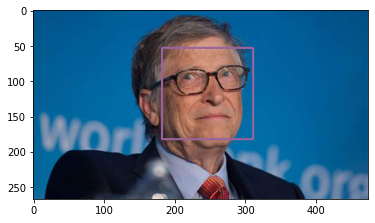

In [9]:
#This will find the face in the image provided
img_bill=face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/FaceRecognition_OpenCV/known_images/Bill Gates.jpg')
billfaceloc=face_recognition.face_locations(img_bill)[0]  #Gives 4 values which are locations of Topright and Bottom Left so as to draw the rectacngle
cv2.rectangle(img_bill,(billfaceloc[3],billfaceloc[0]),(billfaceloc[1],billfaceloc[2]),(155,100,155),2) # Have a rectangle over the image
plt.imshow(img_bill)
plt.show()

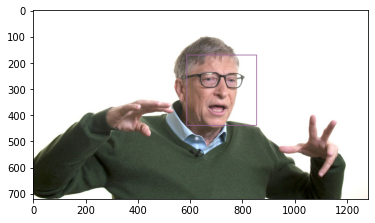

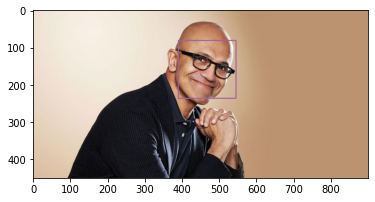

In [29]:
#Doing Similar procedure for test image
img_bill_test=face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/FaceRecognition_OpenCV/test_images/billgates.jpg')
billtestloc=face_recognition.face_locations(img_bill_test)[0]
cv2.rectangle(img_bill_test,(billtestloc[3],billtestloc[0]),(billtestloc[1],billtestloc[2]),(155,100,155),2)
plt.imshow(img_bill_test)
plt.show()

#Doing Similar procedure for test image 2
img_sal_test=face_recognition.load_image_file('/content/drive/MyDrive/Colab Notebooks/FaceRecognition_OpenCV/test_images/Satya Nadella.jpg')
saltestloc=face_recognition.face_locations(img_sal_test)[0]
cv2.rectangle(img_sal_test,(saltestloc[3],saltestloc[0]),(saltestloc[1],saltestloc[2]),(155,100,155),2)
plt.imshow(img_sal_test)
plt.show()

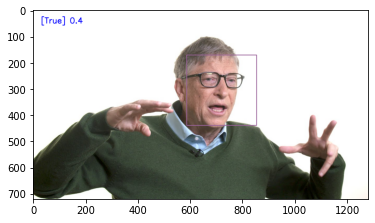

In [30]:
encodedbill=face_recognition.face_encodings(img_bill)[0]
encodedtestbill=face_recognition.face_encodings(img_bill_test)[0]
results=face_recognition.compare_faces([encodedbill],encodedtestbill)
dist=face_recognition.face_distance([encodedbill],encodedtestbill)
# Correct Image
cv2.putText(img_bill_test,f'{results} {round(dist[0],1)}',(30,50),cv2.FONT_ITALIC,1,(0,0,255),2 )
plt.imshow(img_bill_test)
plt.show()

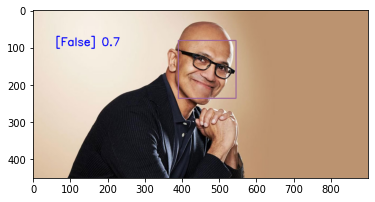

In [31]:

encodedtestsal=face_recognition.face_encodings(img_sal_test)[0]
results=face_recognition.compare_faces([encodedbill],encodedtestsal)
dist=face_recognition.face_distance([encodedbill],encodedtestsal)
# False Image
cv2.putText(img_sal_test,f'{results} {round(dist[0],1)}',(30,50),cv2.FONT_ITALIC,1,(0,0,255),2 )
plt.imshow(img_sal_test)
plt.show()